In [86]:
# Import necessary libraries
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#Load the dataset
df=pd.read_csv("dataset/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [88]:
# Check data information to understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### Change all categorical values to numeric values

In [89]:
# Replace Yes with 1 and No with zero
df.replace({"Yes":1, "No":0}, inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

Here Diabetic column is looking like a numeric column still it is showing object type so check the uniques values of Diabetic column.

In [91]:
df["Diabetic"].unique()

array([1, 0, 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [92]:
# Converting Diabetic column to numerical column
df["Diabetic"].replace({1:1,0:2,"No, borderline diabetes":3,"Yes (during pregnancy)":4}, inplace=True)

In [93]:
df["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [94]:
# Converting AgeCategory column to numerical column
df["AgeCategory"].replace({'18-24':1,'25-29':2,'30-34':3,'35-39':4,'40-44':5,'45-49':6, '50-54':7,'55-59':8, '60-64':9,'65-69':10,'70-74':11,'75-79':12,  '80 or older':13}, inplace=True)

In [95]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,8,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,13,White,2,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,10,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,12,White,2,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,5,White,2,1,Very good,8.0,0,0,0


In [96]:
df["Sex"].replace({"Male":1, "Female":0}, inplace=True)

In [97]:
df["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [98]:
# Converting Race column to numerical column
df["Race"].replace({'White':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5,'Hispanic':6}, inplace=True)

In [99]:
# Converting GenHealth column to numerical column
df["GenHealth"].replace({'Very good':1,'Fair':2,'Good':3,'Poor':4,'Excellent':5}, inplace=True)

In [100]:
# Check info to see anomalies in the data after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

#### Selecting important columns using correlation

In [101]:
corr_matrix=df.corr()
corr_matrix

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,-0.039285,-0.147366,-0.100030,-0.007015,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,0.030883,-0.142816,-0.150616,-0.073872,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,-0.061821,-0.046754,-0.097174,-0.039288,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,-0.021080,0.042161,0.017487,0.001944,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.016025,-0.085116,-0.079455,-0.001085,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,0.002861,-0.119936,-0.232283,0.026595,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,0.026097,-0.008589,-0.095808,-0.010912,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,0.001444,-0.165908,-0.278524,0.003392,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,-0.003377,-0.054784,0.048247,0.017133,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,-0.201606,-0.167304,-0.121687,-0.066289,0.104953,-0.058108,0.123190,0.263537


<Axes: >

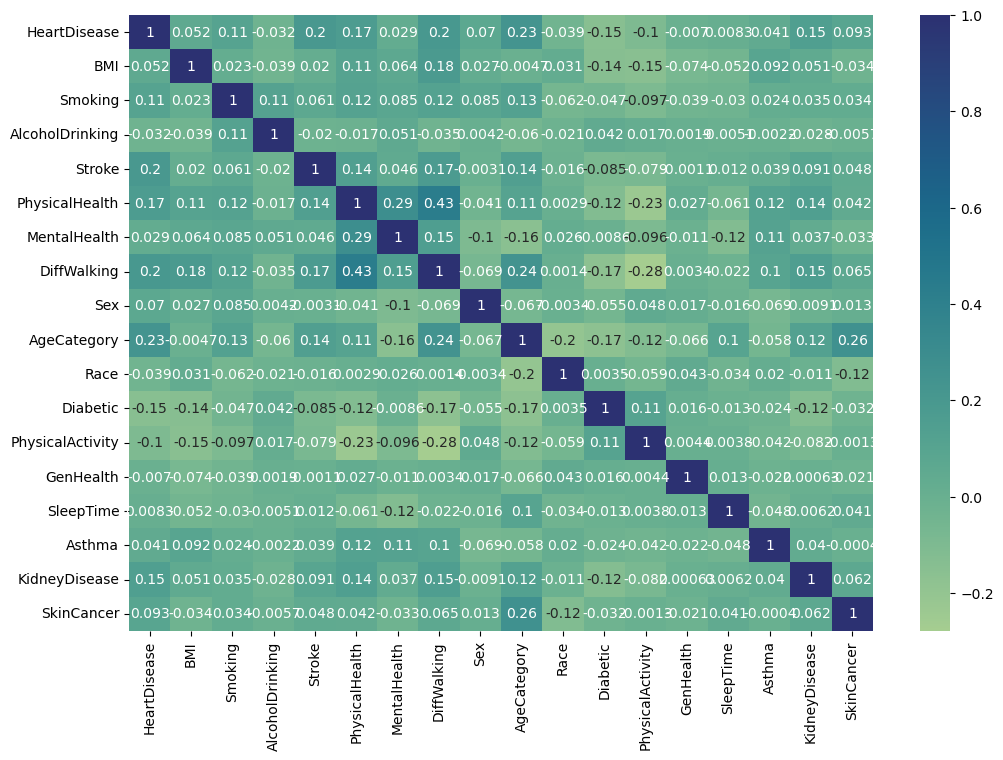

In [102]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,cmap="crest",annot=True)


In [103]:
imp_cols=['HeartDisease','BMI', 'Smoking', 'AlcoholDrinking', 'Stroke','PhysicalHealth','MentalHealth','DiffWalking','Diabetic', 'PhysicalActivity','Asthma', 'KidneyDisease']

In [104]:
trainig_data = df[imp_cols]

#### Data spliting into Input/output and training/testing set

In [105]:
# Split the data into input and output
X=df[imp_cols].drop(columns=["HeartDisease"])
y=df["HeartDisease"]

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

#### Train logistic regression model

In [107]:
LR=LogisticRegression()

In [108]:
LR.fit(X_train,y_train)

c:\Users\bhawa\miniconda3\envs\dataScience\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Performance of the model

In [109]:
pred_y_train = LR.predict(X_train)
pred_y_test = LR.predict(X_test)
from sklearn.metrics import accuracy_score
# Check accuracy score on training data
print("Accuracy score on training data: ",accuracy_score(y_train, pred_y_train) ) 
# Check accuracy on test data
print("Accuracy score on test data: ",accuracy_score(y_test, pred_y_test)) 


Accuracy score on training data:  0.9144450003573726
Accuracy score on test data:  0.9155921992099146
